In [ ]:
#PACOTES QUE PRECISAM SER INSTALADOS E ATUALIZADOS
#ESSE TRECHO FICA COMENTADO CASO NÃO SEJA NECESSÁRIA A INSTALAÇÃO DO PACOTE
#!pip install yfinance --upgrade --no-cache-dir
#!pip install python-bcb


In [30]:
#Análise de Dados econômicos usando diferentes bases de dados#
#Importando as bibliotecas necessárias
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
today = date.today()

import pandas_datareader.data as web
import yfinance as yf
import fundamentos as fts
#1.1.0 - Assim percorremos todos os dados obtidos no Yahoo Finance.\n
#1.1.2 - Outra biblioteca para análise estatística, voltada para conseguir comparar os gráficos do CDI/IBOV
import seaborn as sns; sns.set()
import bcb 
from bcb import sgs

In [31]:
#Base de dados do banco do Brasil usando API
def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df
    

            IPCA
Date            
1998-01-01  0.71
1998-02-01  0.46
1998-03-01  0.34
1998-04-01  0.24
1998-05-01  0.50
...          ...
2022-08-01 -0.36
2022-09-01 -0.29
2022-10-01  0.59
2022-11-01  0.41
2022-12-01  0.62

[300 rows x 1 columns]


<AxesSubplot: xlabel='Date'>

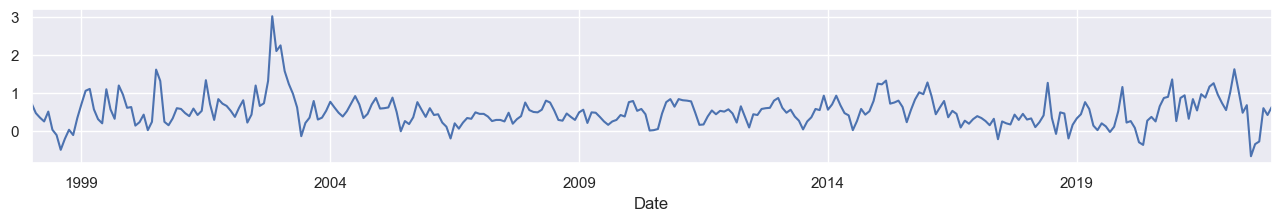

In [32]:
#Importando dados usando a biblioteca BCB
ipca2 = sgs.get(('IPCA', 433), last=300)
print(ipca2)
ipca2['IPCA'].plot(figsize=(16,2))

In [41]:
#Percorrendo a base de dados do Yahoo
yf.pdr_override()
# E com o comando web.get_data_yahoo podemos ter os dados históricos da bovespa
# ÍNDICES BRASILEIROS
ibov = web.get_data_yahoo('^BVSP', start='2000-11-03')
ifix = web.get_data_yahoo('IFIX.SA', start='2000-01-01')
#ÍNDICES AMERICANOS
sp500 = web.get_data_yahoo('^GSPC', start='2000-01-01')
#COMMODITIES
crudeoil = web.get_data_yahoo('CL=F', start='2000-01-01')
gold = web.get_data_yahoo('GC=F', start='2000-01-01')
#CRIPTOMOEDAS
btcusd = web.get_data_yahoo('BTC-USD', start=datetime.datetime(2019,1,1), end=today)
# RENDA FIXA BR & INDICES DE INFLAÇÃO BR
ipca = sgs.get(('IPCA', 433), last=12*365)
igpm = sgs.get(('IGPM', 189), last=12)
selic_meta = sgs.get(('SELIC_META', 432), last=12*700)
selic = sgs.get(('SELIC', 1178), last=12*700)
reservas_internacionais = sgs.get(('RESERVAS INT', 13621), last=12)
cdi = sgs.get(('CDI', 12), last=(12*365))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [34]:
print(btcusd)

                    Open          High           Low         Close  \
Date                                                                 
2019-01-01   3746.713379   3850.913818   3707.231201   3843.520020   
2019-01-02   3849.216309   3947.981201   3817.409424   3943.409424   
2019-01-03   3931.048584   3935.685059   3826.222900   3836.741211   
2019-01-04   3832.040039   3865.934570   3783.853760   3857.717529   
2019-01-05   3851.973877   3904.903076   3836.900146   3845.194580   
...                  ...           ...           ...           ...   
2023-01-14  19910.537109  21075.142578  19907.828125  20976.298828   
2023-01-15  20977.484375  20993.748047  20606.986328  20880.798828   
2023-01-16  20882.224609  21360.875000  20715.746094  21169.632812   
2023-01-17  21175.833984  21438.660156  20978.533203  21161.519531   
2023-01-18  21161.050781  21564.501953  20541.544922  20688.781250   

               Adj Close       Volume  
Date                                   
2019-01-0

In [ ]:
print(cdi)
cdi['CDI'].plot(figsize=(16,2))

In [ ]:
igpm.plot()

<AxesSubplot: xlabel='Date'>

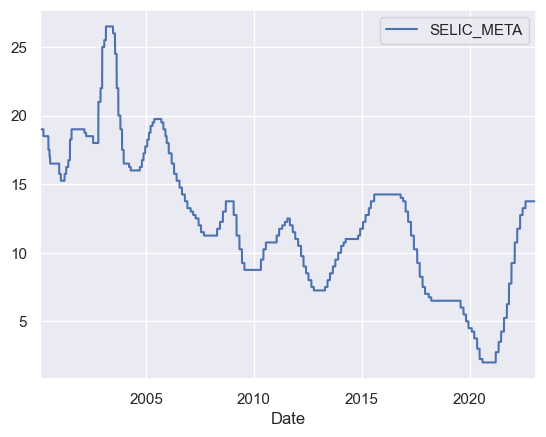

In [43]:
selic_meta.plot()

<AxesSubplot: xlabel='Date'>

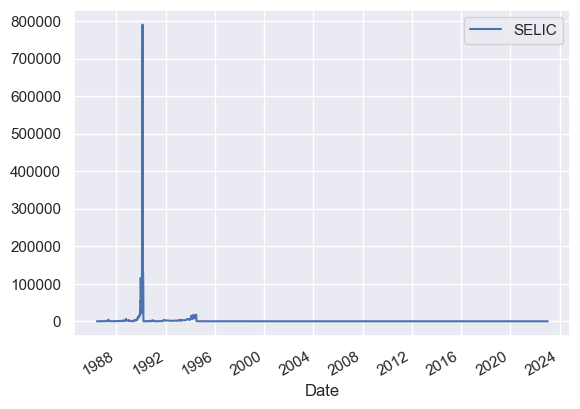

In [42]:
selic.plot()

In [ ]:
reservas_internacionais.plot(figsize=(16,2))

In [ ]:
ibov['Adj Close'].tail(365).plot(figsize=(16,2))
plt.title('IBOV')
plt.xlabel('Tempo')
plt.ylabel('Valor do índice')

In [ ]:
ibov.tail(7) 

In [ ]:
ibov.head(7)

In [ ]:
ibov.tail(15)['Adj Close'].plot(figsize=(16,2))
plt.title('IBOV - Últimos 7 dias')
plt.xlabel('Intervalo de tempo - Dias')
plt.ylabel('BVSP - 15 dias passados')

In [ ]:
ibov['Close'].plot()
plt.title('Ibovespa - Histórico')
plt.xlabel('Anos')
plt.ylabel('BVSP')

In [ ]:
sp500['Adj Close'].tail(365).plot(figsize=(16,2))
plt.title('SP500')
plt.xlabel('Tempo')
plt.ylabel('Valor do índice')

In [ ]:
btcusd['Adj Close'].tail(365).plot(figsize=(16,2))
plt.title('btc-usd')
plt.xlabel('Tempo')
plt.ylabel('Valor do índice')

In [ ]:
ipca.plot(figsize=(16,2))
plt.title("IPCA")
plt.xlabel('Intervalo de Tempo em anos')
plt.ylabel('Inflação (%)')

In [ ]:
#RETORNOS ACUMULADOS
data_inicio = '2000-01-01'
ibovretorno = yf.download(tickers='^BVSP', start=datetime.datetime(2000,1,1))[['Adj Close']]
ibov_retorno = ibovretorno.pct_change()
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

ipca_acumulado = (1 + ipca[ipca.index >= data_inicio] / 100).cumprod()
ipca_acumulado.iloc[0] = 1

selic_meta_acumulado = (1 + selic_meta[selic_meta.index >= data_inicio] / 100).cumprod()
selic_meta_acumulado.iloc[0] = 1


In [ ]:
ibov_retorno_acumulado.plot()

In [ ]:
cdi_acumulado.plot()

In [ ]:
#CDI vs. IPCA

ax = plt.subplot()
ax.plot(ipca_acumulado, color='red')
ax.plot(cdi_acumulado, color='blue')
ax.plot(ibov_retorno_acumulado, color='green')


In [ ]:
#VOLATILIDADE
pct_ibov = (ibov.Close/ibov.Open).apply(lambda x:x-1)*100
display(pct_ibov.tail(10))


In [ ]:
pct_ibov.tail(10).plot(figsize=(16,2), title='IBOV Volatilidade - 15d')

In [ ]:
pct_ibov.plot(figsize=(16,2), title='IBOV Volatilidade - Completo')

In [ ]:
#
ipca2022 = ipca[(ipca.index.year >= 2021)]
ipca2022.plot()

In [ ]:
#FILTRO POR MÊS
ibov_fatiado12 = ibov[ibov.index.month == 12] 
ibov_fatiado12.tail()

In [ ]:
# FUNDOS IMOBILIÁRIOS #
habt11 = web.get_data_yahoo('HABT11.SA', start='2020-02-01', end=today)
tgar11 = web.get_data_yahoo('TGAR11.SA', start='2020-02-01', end=today)
xplg11 = web.get_data_yahoo('XPLG11.SA', start='2020-02-01', end=today)
mxrf11 = web.get_data_yahoo('MXRF11.SA', start='2020-02-01', end=today)
flma11 = web.get_data_yahoo('FLMA11.SA', start='2020-02-01', end=today)
knri11 = web.get_data_yahoo('KNRI11.SA', start='2020-02-01', end=today)
bcff11 = web.get_data_yahoo('BCFF11.SA', start='2020-02-01', end=today)
xpsf11 = web.get_data_yahoo('XPSF11.SA', start='2020-02-01', end=today)
xpci11 = web.get_data_yahoo('XPCI11.SA', start='2020-02-01', end=today)
xpml11 = web.get_data_yahoo('XPML11.SA', start='2020-02-01', end=today)

In [ ]:
cota_xpci11 = xpci11["Adj Close"].plot(figsize=(16,2), label="xpci11 - cotação")

In [ ]:
cotabcff11 = bcff11["Adj Close"].plot(figsize=(8,2), label=bcff11)
cotaxpsf11 = xpsf11["Close"].plot(figsize=(8,2), label=xpsf11)
cotamxrf11 = mxrf11["Close"].plot(figsize=(8,2), label=mxrf11)
cotaxplg11 = xplg11["Close"].plot(figsize=(8,2), label=xplg11)
cotaxpci11 = xpci11["Close"].plot(figsize=(8,2), label=xpci11)
cotaknri11 = knri11["Close"].plot(figsize=(8,2), label=knri11)

In [ ]:
# Baixando dados da sobre ITSA4 pelo YF
itsa4 = web.get_data_yahoo('ITSA4.SA', start=datetime.datetime(2000,1,1), end=datetime.datetime.today())
# Gráfico do fechamento da cota
cota_itsa4 = itsa4["Close"].plot(figsize=(16,2), title='ITSA4')

In [ ]:
#Função lambda da volatilidade
pct_itsa4 = (itsa4.Close/itsa4.Open).apply(lambda x:x-1)*100

display(pct_itsa4.head(10))


In [ ]:
#Gráfico da volatilidade
pct_itsa4.tail(15).plot(figsize=(8,2))

In [ ]:
#CRIAR FUNÇÃO QUE EXECUTA O PROCEDIMENTO DE ANGARIAR O GRÁFICO, A VOLATILIDADE E EXIBIR
# O PARÂMETRO É O TICKER

In [ ]:
#BIBLIOTECA FUNDAMENTOS

fts_itub4 = fts.get_fundamentos('ITUB4')
print(fts_itub4)



In [ ]:
#Puxando uma coluna específica
fts_itub4['Dividendos']


In [ ]:
fts_itub4['Dividendos'].plot()


In [ ]:
for col in fts_itub4.columns:
    print(col)

In [ ]:
 #Todos os fundamentos do primeiro trimestre de 2020,
ftsitub41t20 = fts.get_fundamentos('ITUB4', year=2020, quarter=1)
#Todos os fundamentos dos terceiros trimestres ou de qualquer semestre específico, basta mudar o valor 3 por outro
ftsitub43t = fts.get_fundamentos('ITUB4', quarter=3)

In [ ]:
#Fundamentos das empresas em carteira
#Todos os fundamentos históricos, anualmente
#O comando fts.get_fundamentos serve para puxar o fundamento da empresa
ftsbees3 = fts.get_fundamentos('BEES3')
ftsabev3 = fts.get_fundamentos('ABEV3')
ftsklbn4 = fts.get_fundamentos('KLBN4')
ftswege3 = fts.get_fundamentos('WEGE3')
ftsjhsf3 = fts.get_fundamentos('JHSF3')
ftstris3 = fts.get_fundamentos('TRIS3')
ftstpis3 = fts.get_fundamentos('TPIS3')
ftsbpan4 = fts.get_fundamentos('BPAN4')
ftsitub4 = fts.get_fundamentos('ITUB4')
ftsrcsl4 = fts.get_fundamentos('RCSL4')
ftsoibr3 = fts.get_fundamentos('OIBR3')
ftsposi3 = fts.get_fundamentos('POSI3')
ftstaee3 = fts.get_fundamentos('TAEE3')
ftsengi4 = fts.get_fundamentos('ENGI4')
ftssula4 = fts.get_fundamentos('SULA4')
ftsslce3 = fts.get_fundamentos('SLCE3')
ftsegie3 = fts.get_fundamentos('EGIE3')
ftsmrve3 = fts.get_fundamentos('MRVE3')
ftsgrnd3 = fts.get_fundamentos('GRND3')
ftsitsa4 = fts.get_fundamentos('ITSA4')
ftsigta3 = fts.get_fundamentos('IGTA3')

In [ ]:
#Balanços anuais
balance_petr4 = fts.get_balanco('PETR4')
for col in balance_petr4:
    print(col)

In [ ]:
VT = web.get_data_yahoo('VT')


In [ ]:
VT["Adj Close"].plot()